In [60]:
import plotly.offline as pox
import plotly.graph_objs as go
import numpy as np
import talib as tl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import talib as ta
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import alpaca_trade_api as tradeapi
from alpaca_trade_api import TimeFrame, TimeFrameUnit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import adfuller
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import time


In [61]:
SEC_KEY = 'IBpWZnzOVLT8nUNZMwbfWg9oV0sZrkAHPQYtsRFP'
PUB_KEY ='PKBEIUYRXMQIO5JXOBAJ'
BASE_URL ='https://paper-api.alpaca.markets'
api = tradeapi.REST(key_id= PUB_KEY, secret_key=SEC_KEY, base_url=BASE_URL) # For real trading, don't enter a base_url
df = api.get_bars("AAPL", TimeFrame(1, TimeFrameUnit.Day), "2016-01-01", "2023-01-01").df # Get one bar object for each of the past 5 minutes
df.reset_index(inplace=True)
df.head()

,timestamp,open,high,low,close,volume,trade_count,vwap
0,2016-01-04 05:00:00+00:00,102.61,105.368,102.00,105.35,67611658,351450,104.048524
1,2016-01-05 05:00:00+00:00,105.75,105.850,102.41,102.71,55787192,321363,103.415766
2,2016-01-06 05:00:00+00:00,100.48,102.370,99.87,100.70,68340388,409162,100.852488
3,2016-01-07 05:00:00+00:00,98.63,100.130,96.43,96.45,81094357,462834,98.069324
4,2016-01-08 05:00:00+00:00,98.55,99.110,96.76,96.96,70797966,419804,97.923007


In [62]:
df["close"] =  df['close'] * 100
df["high"]  =  df['high']  * 100
df["low"]   =  df['low']   * 100

In [63]:
df['future_returns'] = df['close'].pct_change().shift(-1)
signal=[]
for i in range(len(df)):
            if (df['future_returns'][i]  > 0):
                signal.append(1)
            elif (df['future_returns'][i] < 0):
                signal.append(0)
            else:
                signal.append(0)
df['signal']=signal

df['High - Close']=(df['high']- df["close"]).shift(-1)
df['Close - Low']=(df["close"]- df['low']).shift(-1)
df.dropna(inplace=True)
y = df[['signal']].copy()
X = df[['High - Close','Close - Low']].copy()

In [64]:
split_percentage = 0.8
split = int(split_percentage*len(df))
# Train data set
X_train = X[:split]
y_train = y[:split]
X_test =  X[split:]
y_test =  y[split:]
model = RandomForestClassifier(n_estimators=5,max_depth=3,random_state=1)
model.fit(X_train, y_train['signal'])
start_time = time.time()

# run the code
y_pred = model.predict(X_test)

# get end time
end_time = time.time()
elapsed_time = end_time - start_time
Accuracy =accuracy_score(y_test, y_pred)
print(Accuracy)
elapsed_time 

0.8328611898016998


0.008006572723388672

In [65]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,

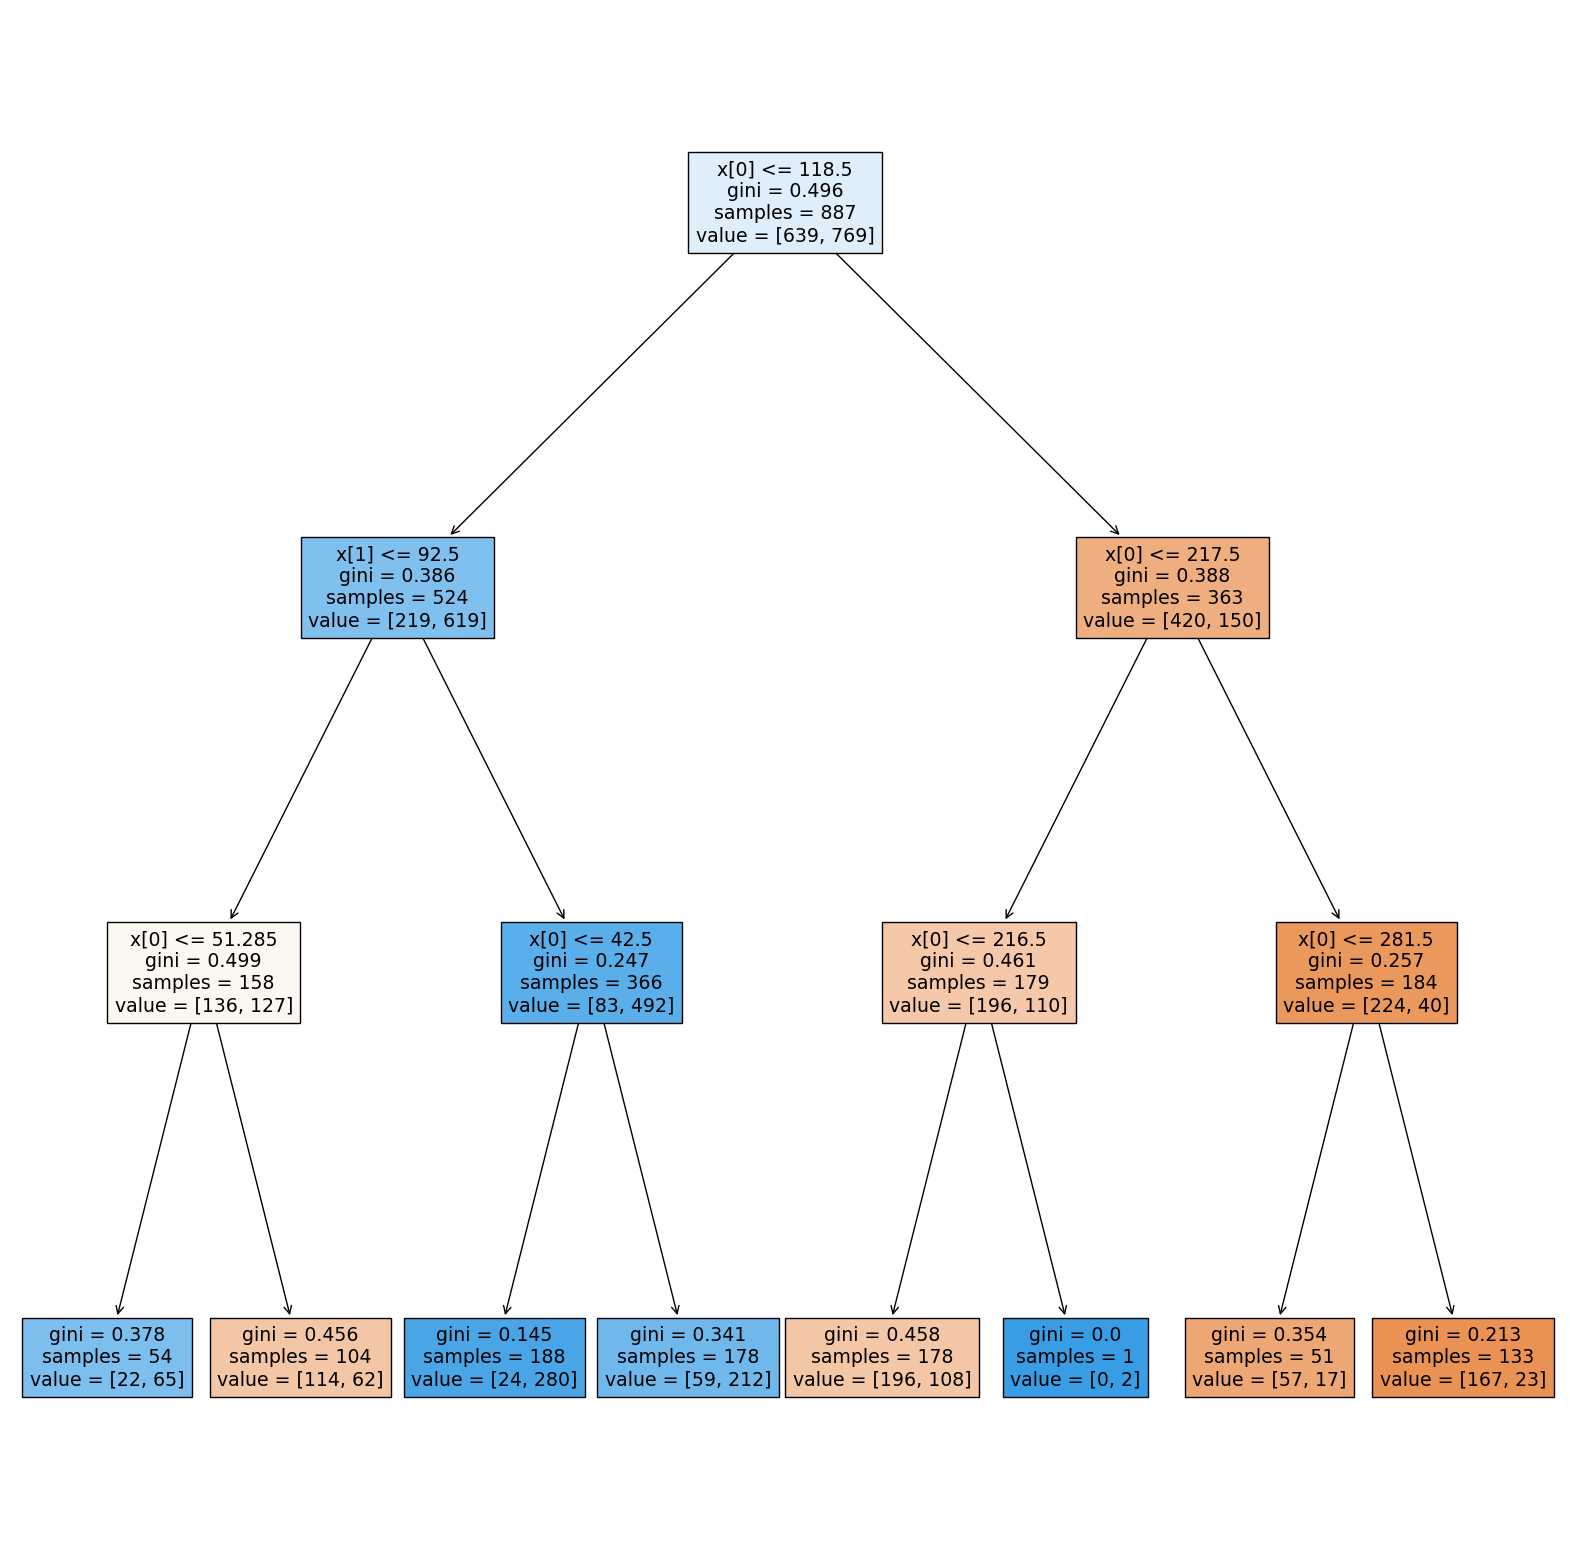

In [70]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[4], filled=True)